Copyright (C) 2025  Diarmuid

This program is free software: you can redistribute it and/or modify\
it under the terms of the GNU General Public License as published by\
the Free Software Foundation, either version 3 of the License, or\
(at your option) any later version.

This program is distributed in the hope that it will be useful,\
but WITHOUT ANY WARRANTY; without even the implied warranty of\
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the\
GNU General Public License for more details.

You should have received a copy of the GNU General Public License\
along with this program.  If not, see <https://www.gnu.org/licenses/>.

----------------------------------------------------------------------

Author: Diarmuid O"Neill\
Student Number: C00282898\
Date: 04/11/2025\
Brief Description:\
This project aims to investigate if sleep and lifestyle factors can \
predict the presence of sleep disorders. The full dataset has 374  
entries. See Technical Specification for more information. \
This notebooks uses Gaussian Naieve Bayes to ...

Standard Imports

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib. pyplot as plt
import matplotlib.patches as mp
plt.style.use("seaborn-v0_8-whitegrid")
import numpy as np

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv("Sleep_Health_and_Lifestyle_Dataset.csv")

Gaussian Naieve Bayes

The Gaussian Naieve Bayes model in this notebook aims to classify different sleep disorders and investigate the relationship between Quality of Sleep, Stress Level and Sleep Disorders. It investigates if it is possible to predict the presence of a specific sleep disorders (Insomnia and Sleep Apnea) given stress and sleep quality levels. Sleep Quality is a self reported rating, ranging from 1-10 and Stress Level is also a self reported rating, ranging from 1-10. An instance where an individual does not have a sleep disorder appears as a green dot on the graph, insomnia appears as a red dot and sleep apnea appears in blue. It is expected that individuals with lower sleep quality and higher stress will be more likely to have insomnia and sleep apnea.

This first graph explores the data to find any obvious correlations. 

Correlation Coefficients for Insomnia
Stress Level        0.139380
Quality of Sleep   -0.332406
dtype: float64
Correlation Coefficients for Sleep Apnea
Stress Level        0.081582
Quality of Sleep   -0.046254
dtype: float64


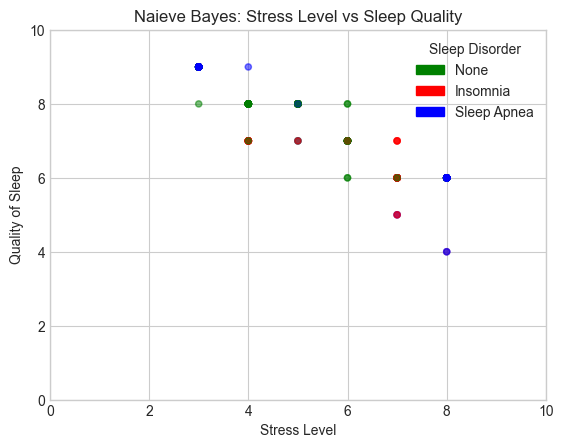

In [26]:
# Map Sleep Disorder to colors
colour_map = {"Insomnia":"red", "Sleep Apnea":"blue"}
colours = dataset["Sleep Disorder"].map(colour_map).fillna("green")

plt.ylim(0,10)
plt.xlim(0, 10)
# Added opacity to help with visualization
plt.scatter(dataset["Stress Level"], dataset["Quality of Sleep"], c=colours, alpha=0.3, s=20)
plt.xlabel("Stress Level")
plt.ylabel("Quality of Sleep")
plt.title("Naieve Bayes: Stress Level vs Sleep Quality")
patches = [
    mp.Patch(color='green', label='None'),
    mp.Patch(color='red', label='Insomnia'),
    mp.Patch(color='blue', label='Sleep Apnea')
]
plt.legend(handles=patches, title='Sleep Disorder')

print("Correlation Coefficients for Insomnia")
print(dataset[["Stress Level", "Quality of Sleep"]].corrwith((dataset['Sleep Disorder'] == 'Insomnia').astype(int)))
print("Correlation Coefficients for Sleep Apnea")
print(dataset[["Stress Level", "Quality of Sleep"]].corrwith((dataset['Sleep Disorder'] == 'Sleep Apnea').astype(int)))

From looking at this graph we can see that sleep apnea appears across a wide range of stress levels and sleep quality levels. This means there is not a strong correalation between these features and sleep apnea. However there may be a slight correlation between the presence of insomnia and sleep quality and stress. In this model insomnia only appears when sleep quality is less than 8 and stress is higher than 3. \
A stress level correlation coefficient of 0.13 for Insomnia indicates a small positive correalation between stress and the presence of insomnia in an individual. The quality of sleep correlation coefficient for insomnia of -0.33 indicates a negative correlation between quality of sleep and the presence of insomnia in an individual. A stress level correlation coefficient  of 0.082 for sleep apnea indicates a very weak positive correlation between stress level and the presence of Sleep Apnea in an indiv. A Quality of sleep  correlation coefficient of -0.046 for sleep apnea indicates a very weak negative correlation between quality of sleep and the presence of sleep apnea in an individual.

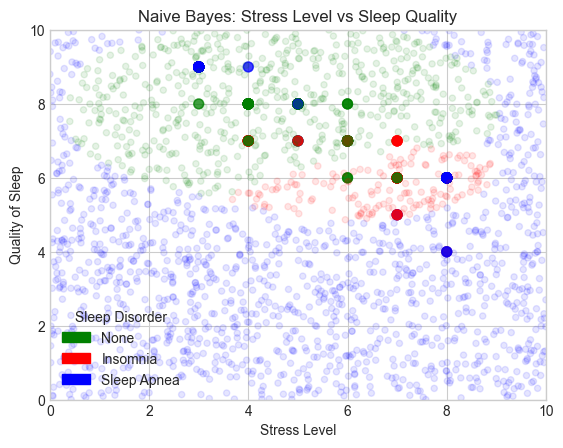

In [27]:
dataset["Sleep Disorder"] = dataset["Sleep Disorder"].fillna("None")

stress = dataset["Stress Level"].values
sleepQuality = dataset["Quality of Sleep"].values
coords = np.column_stack((stress, sleepQuality))

le = LabelEncoder()
labels = le.fit_transform(dataset["Sleep Disorder"])

model = GaussianNB()
model.fit(coords, labels)

rng = np.random.RandomState(0)
Xnew = [0,0] + [10,10] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

colour_map_nb = {cls: col for cls, col in zip(le.classes_, ["red", "green", "blue"])}

colours = [colour_map_nb[cls] for cls in le.inverse_transform(labels)]
ynew_colours = [color_map_nb[cls] for cls in le.inverse_transform(ynew)]

plt.ylim(0,10)
plt.xlim(0,10)
plt.scatter(coords[:, 0], coords[:, 1], c=colours, s=50, alpha=0.5)
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew_colours, s=20, alpha=0.1)

patches = [
    mp.Patch(color='green', label='None'),
    mp.Patch(color='red', label='Insomnia'),
    mp.Patch(color='blue', label='Sleep Apnea')
]
plt.legend(handles=patches, title='Sleep Disorder')
plt.xlabel("Stress Level")
plt.ylabel("Quality of Sleep")
plt.title("Naive Bayes: Stress Level vs Sleep Quality")
plt.show()

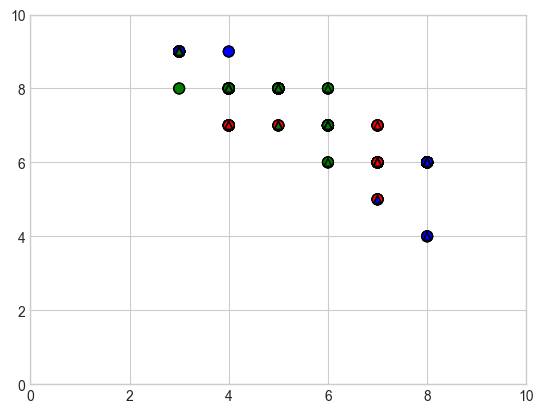

In [28]:
# random_state ensures reproducibility 
# test_size=0.3 means that 30% of the data is used for testing and 70% is used for training
X_train, X_test, y_train, y_test = train_test_split(coords, labels, test_size=0.3, random_state=42)

# Train model
model = GaussianNB()
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

plt.ylim(0,10)
plt.xlim(0, 10)

train_colours = [colour_map_nb[cls] for cls in le.inverse_transform(y_train)]
test_colours  = [colour_map_nb[cls] for cls in le.inverse_transform(y_test)]

# Training points
plt.scatter(X_train[:,0], X_train[:,1], c=train_colours, s=60, edgecolor='k', label='Train')

# Testing points
plt.scatter(X_test[:,0], X_test[:,1], c=test_colours, s=30, marker='^', edgecolor='k', label='Test')

Text(0.5, 1.0, 'Naieve Bayes: Age vs Sleep Duration')

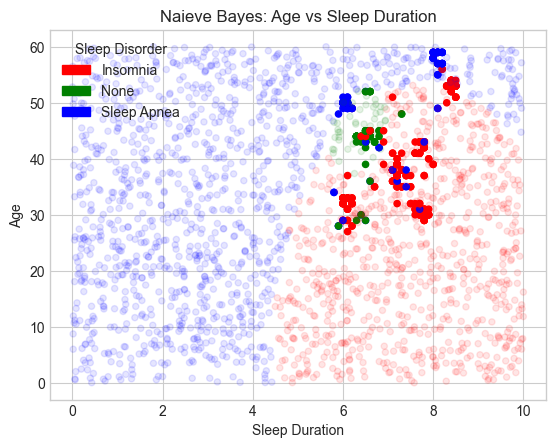

In [30]:
sleepDuration = dataset["Sleep Duration"].values
age = dataset["Age"].values
coords = np.column_stack((sleepDuration, age))

le = LabelEncoder()
labels = le.fit_transform(dataset["Sleep Disorder"])

model = GaussianNB()
model.fit(coords, labels)

rng = np.random.RandomState(0)
Xnew = [0,0] + [10,60] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

colour_map = {0: 'green', 1: 'red', 2: 'blue'}
colours = [colour_map[label] for label in labels]
ynew_colours = [colour_map[label] for label in ynew]

plt.scatter(coords[:, 0], coords[:, 1], c=colours, s=20)
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew_colours, s=20, alpha=0.1) 
patches = [
    mp.Patch(color='red', label='Insomnia'),
    mp.Patch(color='green', label='No'),
    mp.Patch(color='blue', label='Sleep Apnea')
]
plt.legend(handles=patches, title='Sleep Disorder')
plt.xlabel("Sleep Duration")
plt.ylabel("Age")
plt.title("Naieve Bayes: Age vs Sleep Duration")